In [1]:
import scipy.io.wavfile as wavio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sr, data = wavio.read(f"data/{1}.wav")

In [3]:
data.shape

(80896, 6)

In [4]:
labels = pd.read_csv("./data_base_pos_vertical/samples.csv")

recs = {}

maximum = 0
for idx, row in labels.iterrows():
    sr, data = wavio.read(f"data_base_pos_vertical/{row.idx}.wav")
    recs[row.q_3] = data[16000:, 1]
    maximum = max(maximum, np.max(np.abs(data[16000:, 1])))

In [5]:
# aud = np.concat([samp[1][:1600] for samp in recs.values()])
# wavio.write("combinedaudio.wav", data=aud, rate=sr)

In [6]:
import librosa

spectras = []
for key, audio in recs.items():
    spectras.append(np.mean(np.abs(librosa.stft(audio/maximum, n_fft=4096)), axis=1))
    print(key)

-0.3
-0.3510204081632653
-0.4020408163265306
-0.4530612244897959
-0.5040816326530613
-0.5551020408163265
-0.6061224489795918
-0.6571428571428571
-0.7081632653061225
-0.7591836734693878
-0.810204081632653
-0.8612244897959183
-0.9122448979591836
-0.963265306122449
-1.0142857142857142
-1.0653061224489797
-1.116326530612245
-1.1673469387755102
-1.2183673469387757
-1.2693877551020407
-1.3204081632653062
-1.3714285714285714
-1.4224489795918367
-1.4734693877551022
-1.5244897959183674
-1.575510204081633
-1.626530612244898
-1.6775510204081634
-1.7285714285714286
-1.779591836734694
-1.8306122448979592
-1.8816326530612248
-1.9326530612244897
-1.9836734693877551
-2.03469387755102
-2.085714285714286
-2.136734693877551
-2.1877551020408164
-2.2387755102040816
-2.289795918367347
-2.340816326530612
-2.3918367346938774
-2.4428571428571426
-2.493877551020408
-2.544897959183673
-2.595918367346939
-2.646938775510204
-2.6979591836734693
-2.7489795918367346
-2.8


In [7]:
spectras[0]

array([ 3.93824914,  7.69650709, 11.1988759 , ...,  0.15117305,
        0.19440042,  0.29220096])

In [19]:
spectrum = np.hstack([spec[:,None] for spec in spectras])

In [31]:
angle = np.rad2deg(np.linspace(-0.3,-2.8,50))

Text(0.5, 0, 'Joint 3 Angle')

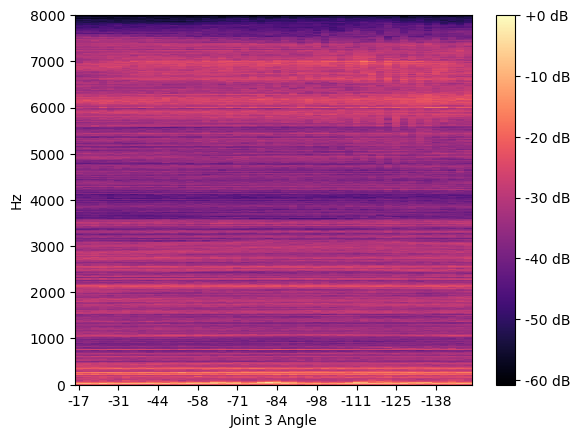

In [46]:
S_db = librosa.amplitude_to_db(spectrum, ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=sr, ax=ax, y_axis="hz", n_fft=4096, x_coords = np.arange(50),x_axis="s") #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.xaxis.set_major_formatter(lambda x, _: f"{angle[min(int(x), 49)]:.0f}")
ax.set_xlabel("Joint 3 Angle")

Text(0.5, 0, 'Joint 3 Angle [deg]')

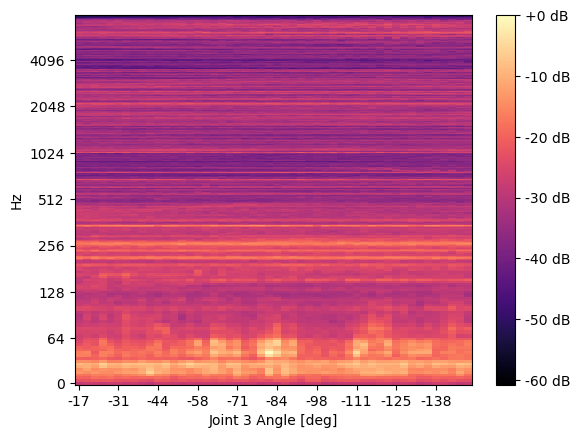

In [51]:
S_db = librosa.amplitude_to_db(spectrum, ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=sr, ax=ax, y_axis="log", n_fft=4096, x_coords=np.arange(50), x_axis="s") #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.xaxis.set_major_formatter(lambda x, _: f"{angle[min(int(x), 49)]:.0f}")
ax.set_xlabel("Joint 3 Angle [deg]")

Text(0.5, 0, 'Joint 3 Angle')

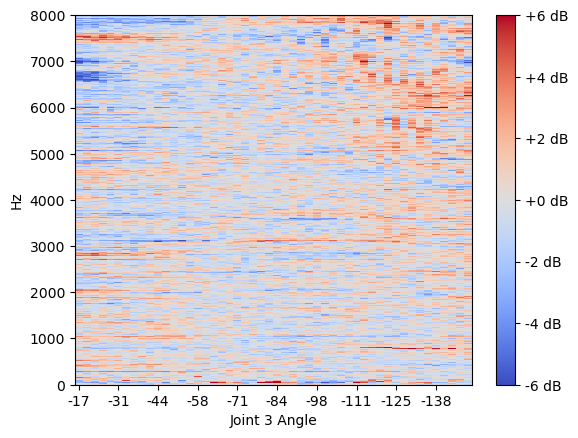

In [48]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db-np.mean(S_db, axis=1)[:,None], sr=sr, ax=ax, y_axis="hz", n_fft=4096, vmin=-6, vmax=6, x_coords=np.arange(50), x_axis="s") #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.xaxis.set_major_formatter(lambda x, _: f"{angle[min(int(x), 49)]:.0f}")
ax.set_xlabel("Joint 3 Angle")
#img.set(cmap=cm.berlin)

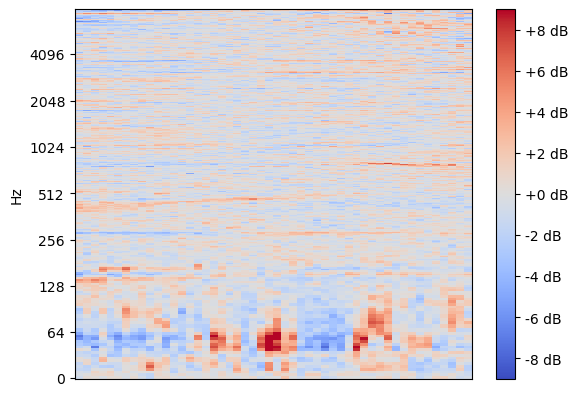

In [50]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db-np.mean(S_db, axis=1)[:,None], sr=sr, ax=ax, y_axis="log", n_fft=4096, vmin=-9, vmax=9)
fig.colorbar(img, ax=ax, format="%+2.f dB")

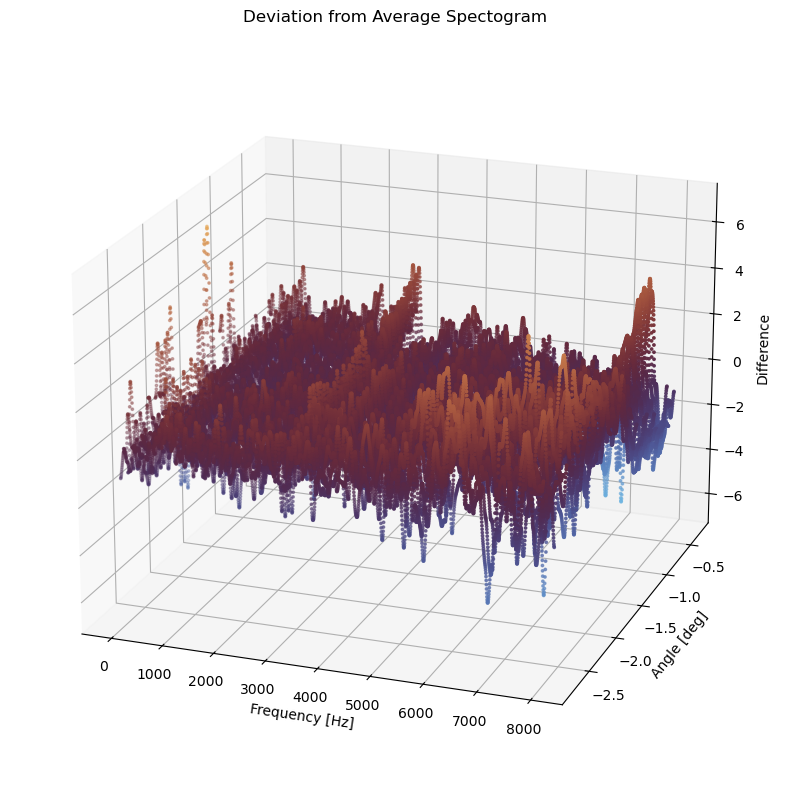

In [13]:
from scipy.ndimage import gaussian_filter1d
from cmcrameri import cm  # more colormaps, esp diverging w/black middle

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

avg = np.mean(S_db, axis=1)
angles = np.linspace(-0.3, -2.8, 50)

for i,angle in enumerate(angles):
    spectrum = gaussian_filter1d(S_db[:,i] - avg, 5)
    ax.scatter(np.linspace(0,8000,len(spectrum)), angle, spectrum, c=spectrum, s=3, vmin=-8, vmax=8, cmap=cm.managua_r)#, c=gaussian_filter1d(np.log(X[i, :])-np.log(avg), 7))

# Labels and title
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Angle [deg]')
ax.set_zlabel('Difference')
ax.set_title('Deviation from Average Spectogram')
ax.view_init(20,-70,0)


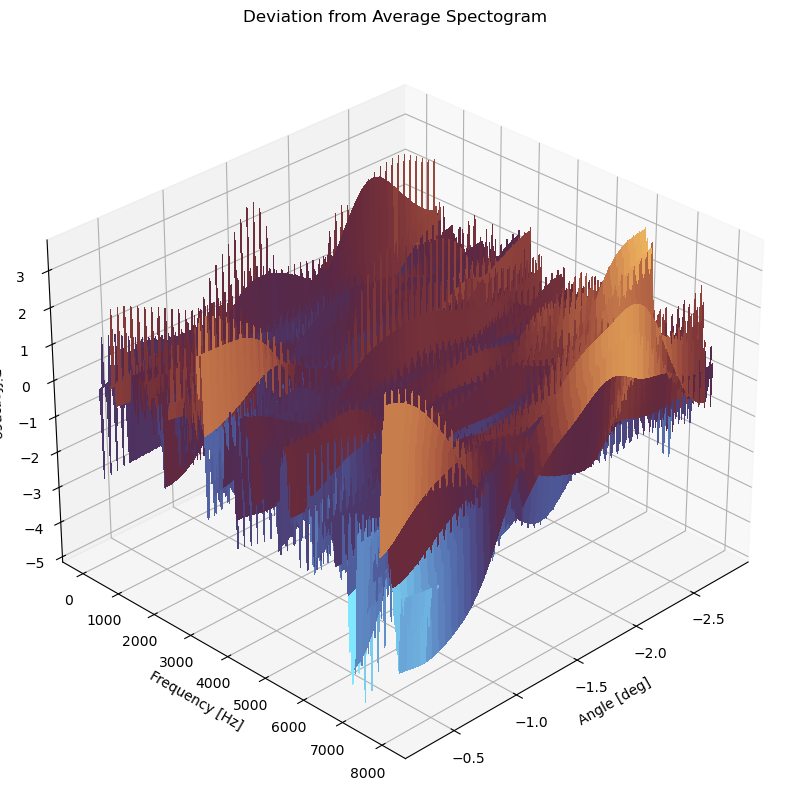

In [14]:
from scipy.ndimage import gaussian_filter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

avg = np.mean(S_db, axis=1)[:,None]

S_db.shape

freq = np.linspace(0,8000,S_db.shape[0])
angle = np.linspace(-0.3,-2.8,50)
x,y = np.meshgrid(angle,freq)


surf = ax.plot_surface(x,y, gaussian_filter((S_db- avg), sigma=3), cmap=cm.managua_r,#cmap="RdBu_r",
                       linewidth=0, antialiased=False, vmin = -3, vmax=3)

ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Angle [deg]')
ax.set_zlabel('Difference')
ax.set_title('Deviation from Average Spectogram')
ax.view_init(30, 45,0)